#Uvod u znanost o podacima (UZOP) - Projekt - Prvi dio

Ovaj dio projekta rješavate uz skup podataka kojeg će vam poslati asistent kod kojeg ste se prijavili. Ova vježba nosi ukupno 10 bodova. U slučaju bilo kakvih pitanja ili nejasnoća javite se nadležnom asistentu.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Učitajte danu CSV datoteku i prikažite prvih 8 redaka iz skupa podataka. (0,5 boda)

In [2]:
#df = pd.read_csv("Life_Expectancy_Data_fixed.csv",index_col = 0)
df = pd.read_csv("Life_Expectancy_Data_fixed.csv")
df.head(8) #prikaži prvih 8 redaka, PO DEFAULTU ISPISUJE 5 REDAKA

,Entry number,Source,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Income composition of resources,Schooling,Life expectancy,Measles,BMI,under-five deaths,Diphtheria,HIV/AIDS,thinness 5-9 years,thinness 10-19 years
0,0,WHO,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,...,0.479,10.1,1.0,1154,19.1,83,65.0,0.1,17.3,17.2
1,1,WHO,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,...,0.476,10.0,0.0,492,18.6,86,62.0,0.1,17.5,17.5
2,2,WHO,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,...,0.470,9.9,0.0,430,18.1,89,64.0,0.1,17.7,17.7
3,3,WHO,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,...,0.463,9.8,0.0,2787,17.6,93,67.0,0.1,18.0,17.9
4,4,WHO,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,...,0.454,9.5,0.0,3013,17.2,97,68.0,0.1,18.2,18.2
5,5,WHO,Afghanistan,2010,Developing,279.0,74,0.01,79.679367,66.0,...,0.448,9.2,0.0,1989,16.7,102,66.0,0.1,18.4,18.4
6,6,WHO,Afghanistan,2009,Developing,281.0,77,0.01,56.762217,63.0,...,0.434,8.9,0.0,2861,16.2,106,63.0,0.1,18.7,18.6
7,7,WHO,Afghanistan,2008,Developing,287.0,80,0.03,25.873925,64.0,...,0.433,8.7,0.0,1599,15.7,110,64.0,0.1,18.9,18.8


In [3]:
df.columns.values

array(['Entry number', 'Source', 'Country', 'Year', 'Status',
       'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Polio',
       'Total expenditure', 'GDP', 'Population',
       'Income composition of resources', 'Schooling', 'Life expectancy',
       'Measles', 'BMI', 'under-five deaths', 'Diphtheria', 'HIV/AIDS',
       'thinness 5-9 years', 'thinness  10-19 years'], dtype=object)

2. Pronađite monotone i konstantne vrijednosti i uklonite ih. (1 bod)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entry number                     2938 non-null   int64  
 1   Source                           2938 non-null   object 
 2   Country                          2938 non-null   object 
 3   Year                             2938 non-null   int64  
 4   Status                           2938 non-null   object 
 5   Adult Mortality                  2938 non-null   float64
 6   infant deaths                    2938 non-null   int64  
 7   Alcohol                          2744 non-null   float64
 8   percentage expenditure           2938 non-null   float64
 9   Hepatitis B                      2385 non-null   float64
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  GDP                 

In [5]:
df.shape

(2938, 24)

In [6]:
df.nunique()
#monotone vrijednosti - atributi čija vrijednost jednoliko raste

Entry number                       2938
Source                                1
Country                             193
Year                                 16
Status                                2
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Polio                                73
Total expenditure                   819
GDP                                2491
Population                         2279
Income composition of resources     625
Schooling                           173
Life expectancy                       5
Measles                             958
BMI                                 608
under-five deaths                   252
Diphtheria                           81
HIV/AIDS                            200
thinness 5-9 years                  207
thinness  10-19 years               200
dtype: int64

In [194]:
for column in df.columns: #nazivi svih stupaca
    if df[column].nunique() == 1: #vrijednosti pojedinog stupca
        print(f"Konstantne vrijednosti u stupcu: {column}")
        
    if df[column].dtype != 'object':   # samo za numeričke kolone
        if df[column].is_monotonic_increasing or df[column].is_monotonic_decreasing:
            print(f"Monotone vrijednosti u stupcu: {column}")

Konstantne vrijednosti u stupcu: Source


Da nisam prilikom učitavanja csv datoteke napisala **index_col = 0** u kodu iznad bi Entry number registrirao kao monotonu vrijednost pa bi ispisao: Monotone vrijednosti u stupcu: Entry number. U tom slučaju bih i to izbacila naredbom drop

In [195]:
df.drop('Source', axis=1, inplace=True) #inplace ne pravi novi df nego mijenja postojeći
#df.drop('Entry number', axis=1, inplace=True)

In [196]:
df.columns.values

array(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Polio',
       'Total expenditure', 'GDP', 'Population',
       'Income composition of resources', 'Schooling', 'Life expectancy',
       'Measles', 'BMI', 'under-five deaths', 'Diphtheria', 'HIV/AIDS',
       'thinness 5-9 years', 'thinness  10-19 years'], dtype=object)

3. Pronađite nedostajuće vrijednosti. Provedite zamjenu/uklanjanje nedostajućih vrijednosti odgovarajućim postupkom. Objasnite zašto ste primjenili odabrane postupke. (2 boda)

In [197]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Polio                                0
Total expenditure                    0
GDP                                  0
Population                           0
Income composition of resources      0
Schooling                            0
Life expectancy                      0
Measles                              0
BMI                                  0
under-five deaths                    0
Diphtheria                           0
HIV/AIDS                             0
thinness 5-9 years                   0
thinness  10-19 years                0
dtype: int64

In [198]:
df_tmp = df.copy()
df_tmp.columns.values

array(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Polio',
       'Total expenditure', 'GDP', 'Population',
       'Income composition of resources', 'Schooling', 'Life expectancy',
       'Measles', 'BMI', 'under-five deaths', 'Diphtheria', 'HIV/AIDS',
       'thinness 5-9 years', 'thinness  10-19 years'], dtype=object)

In [199]:
# izbaci stupac Hepatitis B
df_tmp = df_tmp.drop(['Hepatitis B'], axis=1)

# izbaci zapise gdje nema podataka o Alcoholu
df_tmp = df_tmp.loc[df_tmp.Alcohol.notnull(), :]

#alternativa za Alcohol..
#country_means = df_tmp.groupby('Country')['Alcohol'].mean().round(2)
#df_tmp['Alcohol'] = df_tmp['Alcohol'].fillna(df_tmp['Country'].map(country_means))

**NAPOMENA** 

Htjela sam vidjeti koliko država bi nestalo ako za alkohol maknem retke gdje fali vrijednost.. Isprobavala sam alternativu gdje se Nan vrijednostima alkohola pridružuje prosjek za svaku zemlju..

**Hepatitis B - stopa cijepljenja protiv hepatitisa B među jednogodišnjacima**

Skroz bih izbacila značajku Hepatitis B jer bi u slučaju uklanjanja nedostajućih zapisa (redaka) izgubila previše podataka (skoro 20%).
Osim toga, neke države (Island, Finska, Japan) uopće nemaju podatke o Hepatitisu pa bih izgubila sve njihove ostale podatke ako bih makla cijeli stupac. Ne mogu napraviti dobru procjenu vrijednosti. 

**Alcohol - zabilježena konzumacija alkohola u osobama starijim od 15 godina u litrama čistog alkohola**

Za Alcohol bih izbacila zapise kojima nedostaje ta značajka jer gubim samo 194/3938 što je malo manje od 7% i primijetila sam da, za razliku od hepatitisa, vrijednosti fale nasumino. Da smo trebali neku dublju analizu s ovim podacima možda bih nastavila razvijati ideju srednje vrijednosti konzumaciju alkohola za pojedinu državu.

In [200]:
country_num = df['Country'].nunique()
country_num_tmp = df_tmp['Country'].nunique()

print('U izvornom df broj zemalja je bio:',country_num, 
      '\nKad smo se makli redke gdje je nedostajala vrijednost za alkohol broj različitih zemalja je:', country_num_tmp)

U izvornom df broj zemalja je bio: 193 
Kad smo se makli redke gdje je nedostajala vrijednost za alkohol broj različitih zemalja je: 191


**Vidimo da smo se riješili Nan vrijednosti (pozivom df_tmp.isna().sum()), ali smo i izgubili podatke za neke 2 zemlje.**

In [201]:
df_tmp.to_csv('life_exp_moja_datoteka.csv', index=False)

In [202]:
df_tmp.isna().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Polio                              0
Total expenditure                  0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
Measles                            0
BMI                                0
under-five deaths                  0
Diphtheria                         0
HIV/AIDS                           0
thinness 5-9 years                 0
thinness  10-19 years              0
dtype: int64

4. Transformirajte kategoričke značajke u numeričke. (1 bod)

In [203]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2744 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2744 non-null   object 
 1   Year                             2744 non-null   int64  
 2   Status                           2744 non-null   object 
 3   Adult Mortality                  2744 non-null   float64
 4   infant deaths                    2744 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2744 non-null   float64
 7   Polio                            2744 non-null   float64
 8   Total expenditure                2744 non-null   float64
 9   GDP                              2744 non-null   float64
 10  Population                       2744 non-null   float64
 11  Income composition of resources  2744 non-null   float64
 12  Schooling                

In [204]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = OneHotEncoder(handle_unknown="ignore") 
encoded_country = encoder.fit_transform(df[['Country']])

# Pretvaranje sparse matrice u običan array
encoded_country_array = encoded_country.toarray()

# Kreiramo DataFrame za kodirane stupce
df_encoded_country = pd.DataFrame(encoded_country_array, columns=encoder.get_feature_names_out(['Country']))

# Spojimo originalni DataFrame s novim stupcima za Country
df_tmp = pd.concat([df.drop(['Country'], axis=1), df_encoded_country], axis=1)
df_tmp

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,Developing,263.0,62,0.01,71.279624,65.0,6.0,8.16,584.259210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,58.0,8.18,612.696514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,Developing,268.0,66,0.01,73.219243,64.0,62.0,8.13,631.744976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,Developing,272.0,69,0.01,78.184215,67.0,67.0,8.52,669.959000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,Developing,275.0,71,0.01,7.097109,68.0,68.0,7.87,63.537231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,723.0,27,4.36,0.000000,68.0,67.0,7.13,454.366654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2934,2003,Developing,715.0,26,4.06,0.000000,7.0,7.0,6.52,453.351155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2935,2002,Developing,73.0,25,4.43,0.000000,73.0,73.0,6.53,57.348340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2936,2001,Developing,686.0,25,1.72,0.000000,76.0,76.0,6.16,548.587312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Za Country sam izabrala One Hot Encoder jer je to varijabla s više kategorija.**

In [205]:
# inicijalizacija enkodera
le = LabelEncoder()
le.fit(df_tmp.loc[:,'Status'])

df_tmp.loc[:,'Status'] = le.transform(df_tmp.loc[:,'Status'])
df_tmp.to_csv('life_exp_moja_datoteka.csv', index=False)
df_tmp

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,1,263.0,62,0.01,71.279624,65.0,6.0,8.16,584.259210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,1,271.0,64,0.01,73.523582,62.0,58.0,8.18,612.696514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,1,268.0,66,0.01,73.219243,64.0,62.0,8.13,631.744976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,1,272.0,69,0.01,78.184215,67.0,67.0,8.52,669.959000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,1,275.0,71,0.01,7.097109,68.0,68.0,7.87,63.537231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,723.0,27,4.36,0.000000,68.0,67.0,7.13,454.366654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2934,2003,1,715.0,26,4.06,0.000000,7.0,7.0,6.52,453.351155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2935,2002,1,73.0,25,4.43,0.000000,73.0,73.0,6.53,57.348340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2936,2001,1,686.0,25,1.72,0.000000,76.0,76.0,6.16,548.587312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Vidimo da je Status pretvoren u 0 ili 1 jer ima samo 2 mogućnosti tj. Developing i Developed. Zato sam i izabrala Label encoder za ovaj problem**

In [206]:
df_tmp.to_csv('life_exp_moja_datoteka.csv', index=False)

5. Za numeričke značajke prikažite srednju (mean), centralnu (median), minimalnu i maksimalnu vrijednost. Za kategoričke značajke ispišite učestalost pojavljivanja svake vrijednosti. (1,5 boda)

In [207]:
df.describe(include='all') 
#top je dominant/most apppeared in feature with num of freq shown
#unique samo za kategoricke pokazuje... tj stringove a ne numericke

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,...,Income composition of resources,Schooling,Life expectancy,Measles,BMI,under-five deaths,Diphtheria,HIV/AIDS,thinness 5-9 years,thinness 10-19 years
count,2938,2938.000000,2938,2938.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.725664,30.303948,4.602861,738.251295,80.940461,82.617767,5.924098,...,0.630362,12.009837,1.685500,2419.592240,38.381178,42.035739,82.393125,1.742103,4.852144,4.821886
std,NaN,4.613841,NaN,124.086215,117.926501,4.052413,1987.914858,25.070016,23.367166,2.400770,...,0.205140,3.265139,1.205679,11467.272489,19.935375,160.445548,23.655562,5.077785,4.485854,4.397621
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,3.000000,0.370000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.100000,0.100000,0.100000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,78.000000,4.370000,...,0.504250,10.300000,1.000000,0.000000,19.400000,0.000000,78.000000,0.100000,1.600000,1.600000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,93.000000,5.755000,...,0.677000,12.300000,2.000000,17.000000,43.500000,4.000000,93.000000,0.100000,3.300000,3.300000
75%,NaN,2012.000000,NaN,227.000000,22.000000,7.702500,441.534144,97.000000,97.000000,7.330000,...,0.772000,14.100000,2.000000,360.250000,56.100000,28.000000,97.000000,0.800000,7.200000,7.100000


6. Normalizirajte numeričke značajke. (1 bod)

In [208]:
means = df_tmp.mean() 
stds = df_tmp.std()   

df_standardized = (df_tmp - means) / stds

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# Standardizacija svih značajki u DataFrame-u
#df_tmp = pd.DataFrame(scaler.fit_transform(df_tmp), columns=df_tmp.columns)
df_standardized

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,GDP,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1.621486,0.45932,0.791984,0.268778,-1.133365,-0.335513,-0.635838,-3.278864,0.931327,-0.453294,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985
1,1.404747,0.45932,0.856456,0.285738,-1.133365,-0.334384,-0.755503,-1.05352,0.939658,-0.451155,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985
2,1.188008,0.45932,0.832279,0.302697,-1.133365,-0.334537,-0.675726,-0.882339,0.918831,-0.449722,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985
3,0.971269,0.45932,0.864515,0.328137,-1.133365,-0.33204,-0.556061,-0.668364,1.081279,-0.446848,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985
4,0.75453,0.45932,0.888691,0.345097,-1.133365,-0.3678,-0.516173,-0.625569,0.810532,-0.492456,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762644,0.45932,4.499084,-0.028017,-0.05993,-0.37137,-0.516173,-0.668364,0.502298,-0.463062,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,13.511582
2934,-0.979384,0.45932,4.434613,-0.036497,-0.13396,-0.37137,-2.949358,-3.236069,0.248213,-0.463139,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,13.511582
2935,-1.196123,0.45932,-0.739209,-0.044977,-0.042656,-0.37137,-0.316731,-0.411593,0.252378,-0.492921,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,13.511582
2936,-1.412862,0.45932,4.200904,-0.044977,-0.711394,-0.37137,-0.197067,-0.283208,0.098261,-0.455976,...,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,-0.073985,13.511582


7. Napravite složeni graf s 4 podgrafa (2 retka i 2 stupca). Dodajte nazive podgrafova i označite osi na svakom od njih. Vizualizirajte sljedeće: (3 boda)
  - Histogram proizvoljne kategoričke značajke
  - Pitni graf ciljne varijable
  - Kutijasti graf proizvoljne numeričke varijable
  - Graf raspršenja proizvoljne 2 numeričke varijable. Obojajte uzorke s obzirom na vrijednost ciljne varijable.

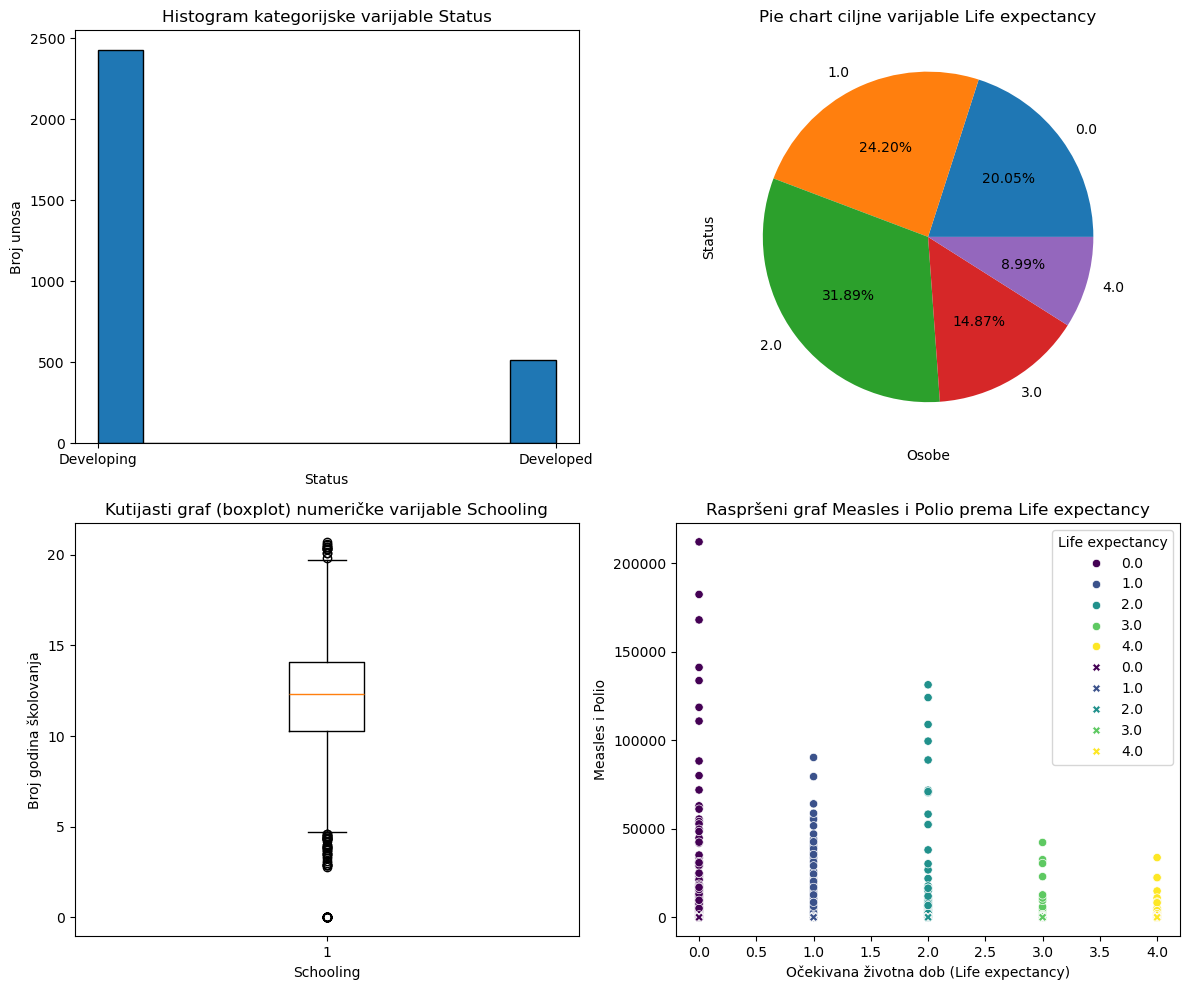

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(df['Status'], bins=10, edgecolor='black')  # Prikaz histograma
plt.title('Histogram kategorijske varijable Status')
plt.xlabel('Status')
plt.ylabel('Broj unosa')

plt.subplot(2, 2, 2)
count_per_life_expectancy = df.groupby('Life expectancy').size().values  # Broj unosa za svaku životnu dob
Life_expectancy = df.groupby('Life expectancy').size().index.values  # Samo imena (kategorije) Life expectancy
plt.pie(count_per_life_expectancy, labels=Life_expectancy, autopct='%.2f%%')  # Postotci u pie chartu
plt.title('Pie chart ciljne varijable Life expectancy')
plt.xlabel('Osobe')
plt.ylabel('Status')

plt.subplot(2, 2, 3)
plt.boxplot(df['Schooling'])
plt.title('Kutijasti graf (boxplot) numeričke varijable Schooling')
plt.xlabel('Schooling')
plt.ylabel('Broj godina školovanja')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Life expectancy'], y=df['Measles'], hue=df['Life expectancy'], palette='viridis', marker='o')
sns.scatterplot(x=df['Life expectancy'], y=df['Polio'], hue=df['Life expectancy'], palette='viridis', marker='X')
plt.title('Raspršeni graf Measles i Polio prema Life expectancy')
plt.xlabel('Očekivana životna dob (Life expectancy)')
plt.ylabel('Measles i Polio')

plt.tight_layout()  
plt.show()
